In [ ]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

In [12]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs = zip(lats,lngs)


In [13]:
# Add the lats and longs to a list
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

615

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [16]:
from config import weather_api_key

In [17]:
import time
from datetime import datetime

In [18]:
import requests
from config import weather_api_key

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data
city_data = []
#PRint the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval   
---------------------------


In [21]:
# Loop through all the cities in our list
for i in range(len(cities)):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + cities[i]

In [22]:
# Loop through all the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Processing Record 1 of Set 13 | hobart
Processing Record 2 of Set 13 | victoria
Processing Record 3 of Set 13 | marfino
Processing Record 4 of Set 13 | hofn
Processing Record 5 of Set 13 | qaanaaq
Processing Record 6 of Set 13 | el balyana
City not found. Skipping...
Processing Record 7 of Set 13 | busselton
Processing Record 8 of Set 13 | bathsheba
Processing Record 9 of Set 13 | marcona
City not found. Skipping...
Processing Record 10 of Set 13 | mar del plata
Processing Record 11 of Set 13 | hasaki
Processing Record 12 of Set 13 | tuktoyaktuk
Processing Record 13 of Set 13 | olean
Processing Record 14 of Set 13 | cape girardeau
Processing Record 15 of Set 13 | bluff
Processing Record 16 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 13 | babanusah
City not found. Skipping...
Processing Record 18 of Set 13 | pemberton
Processing Record 19 of Set 13 | nikolskoye
Processing Record 20 of Set 13 | ushuaia
Processing Record 21 of Set 13 | bubaque
Processi

Processing Record 35 of Set 16 | nakamura
Processing Record 36 of Set 16 | shenjiamen
Processing Record 37 of Set 16 | belaya kholunitsa
Processing Record 38 of Set 16 | tilichiki
Processing Record 39 of Set 16 | ponta do sol
Processing Record 40 of Set 16 | la romana
Processing Record 41 of Set 16 | svetlogorsk
Processing Record 42 of Set 16 | bida
Processing Record 43 of Set 16 | kodiak
Processing Record 44 of Set 16 | oktyabrskiy
Processing Record 45 of Set 16 | puerto escondido
Processing Record 46 of Set 16 | seoul
Processing Record 47 of Set 16 | the valley
Processing Record 48 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 49 of Set 16 | saint-philippe
Processing Record 50 of Set 16 | karratha
Processing Record 1 of Set 17 | solnechnyy
Processing Record 2 of Set 17 | nome
Processing Record 3 of Set 17 | kahului
Processing Record 4 of Set 17 | sao jose da coroa grande
Processing Record 5 of Set 17 | saint-pacome
City not found. Skipping...
Processing Reco

Processing Record 16 of Set 20 | portel
Processing Record 17 of Set 20 | yar-sale
Processing Record 18 of Set 20 | belyy yar
Processing Record 19 of Set 20 | kavieng
Processing Record 20 of Set 20 | parker
Processing Record 21 of Set 20 | namibe
Processing Record 22 of Set 20 | hami
Processing Record 23 of Set 20 | vao
Processing Record 24 of Set 20 | bull savanna
Processing Record 25 of Set 20 | acarau
Processing Record 26 of Set 20 | salto
Processing Record 27 of Set 20 | marzuq
Processing Record 28 of Set 20 | yumen
Processing Record 29 of Set 20 | cape coast
Processing Record 30 of Set 20 | mehamn
Processing Record 31 of Set 20 | mackenzie
Processing Record 32 of Set 20 | olafsvik
Processing Record 33 of Set 20 | mayo
Processing Record 34 of Set 20 | abu dhabi
Processing Record 35 of Set 20 | castrovillari
Processing Record 36 of Set 20 | sabang
Processing Record 37 of Set 20 | dunedin
Processing Record 38 of Set 20 | baltay
Processing Record 39 of Set 20 | roebourne
Processing Rec

Processing Record 3 of Set 24 | pacific grove
Processing Record 4 of Set 24 | pedernales
Processing Record 5 of Set 24 | pandan
Processing Record 6 of Set 24 | domoni
Processing Record 7 of Set 24 | duz
City not found. Skipping...
Processing Record 8 of Set 24 | caracollo
Processing Record 9 of Set 24 | hay river
Processing Record 10 of Set 24 | lahaina
Processing Record 11 of Set 24 | barbar
City not found. Skipping...
Processing Record 12 of Set 24 | u thong
Processing Record 13 of Set 24 | pontes e lacerda
Processing Record 14 of Set 24 | sola
Processing Record 15 of Set 24 | menongue
Processing Record 16 of Set 24 | vostok
Processing Record 17 of Set 24 | illapel
Processing Record 18 of Set 24 | singkang
Processing Record 19 of Set 24 | korla
Processing Record 20 of Set 24 | nago
Processing Record 21 of Set 24 | pisco
Processing Record 22 of Set 24 | ust-kuyga
Processing Record 23 of Set 24 | new guinlo
City not found. Skipping...
Processing Record 24 of Set 24 | geraldton
Processi

In [23]:
len(city_data)

560

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,56.26,73,75,11.50,AU,2022-02-11 21:12:26
1,Victoria,22.2855,114.1577,65.95,89,36,4.00,HK,2022-02-11 21:10:40
2,Marfino,55.7028,37.3822,33.71,69,0,11.18,RU,2022-02-11 21:13:09
3,Hofn,64.2539,-15.2082,28.71,81,100,20.85,IS,2022-02-11 21:13:10
4,Qaanaaq,77.4840,-69.3632,-23.53,60,0,7.34,GL,2022-02-11 21:13:10
5,Busselton,-33.6500,115.3333,58.08,91,43,5.26,AU,2022-02-11 21:10:39
6,Bathsheba,13.2167,-59.5167,81.21,61,40,24.16,BB,2022-02-11 21:13:11
7,Mar Del Plata,-38.0023,-57.5575,63.09,79,100,23.02,AR,2022-02-11 21:13:11
8,Hasaki,35.7333,140.8333,28.80,58,19,13.47,JP,2022-02-11 21:13:11
9,Tuktoyaktuk,69.4541,-133.0374,-23.85,100,55,5.35,CA,2022-02-11 21:13:12


In [25]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-02-11 21:12:26,-42.8794,147.3294,56.26,73,75,11.50
1,Victoria,HK,2022-02-11 21:10:40,22.2855,114.1577,65.95,89,36,4.00
2,Marfino,RU,2022-02-11 21:13:09,55.7028,37.3822,33.71,69,0,11.18
3,Hofn,IS,2022-02-11 21:13:10,64.2539,-15.2082,28.71,81,100,20.85
4,Qaanaaq,GL,2022-02-11 21:13:10,77.4840,-69.3632,-23.53,60,0,7.34
5,Busselton,AU,2022-02-11 21:10:39,-33.6500,115.3333,58.08,91,43,5.26
6,Bathsheba,BB,2022-02-11 21:13:11,13.2167,-59.5167,81.21,61,40,24.16
7,Mar Del Plata,AR,2022-02-11 21:13:11,-38.0023,-57.5575,63.09,79,100,23.02
8,Hasaki,JP,2022-02-11 21:13:11,35.7333,140.8333,28.80,58,19,13.47
9,Tuktoyaktuk,CA,2022-02-11 21:13:12,69.4541,-133.0374,-23.85,100,55,5.35


In [26]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

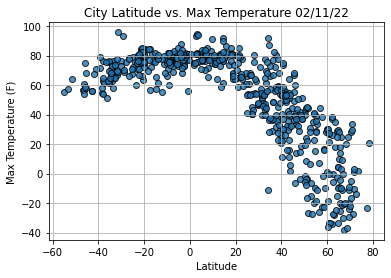

In [29]:
# Import time module
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()



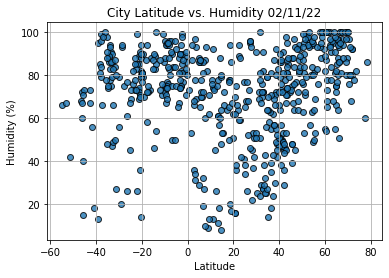

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

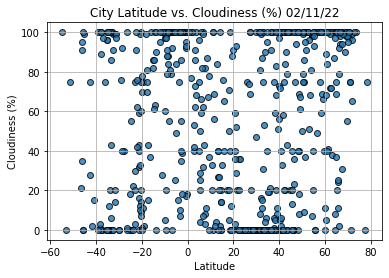

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

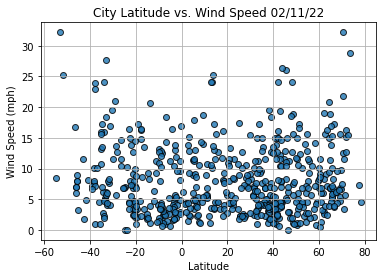

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()